In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Loading the data
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Removing the duplicates and counting the labels
df.drop_duplicates().head()
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LogisticRegression
model = LogisticRegression()
scores = cross_val_score(model, X_scaled, y, cv=5)
print("Logistic Regression Accuracy:", scores.mean())

Logistic Regression Accuracy: 0.9991573235277963


In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.06527521 0.05612313]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.9982795547909132


In [9]:
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9982795547909132


In [10]:
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=20)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

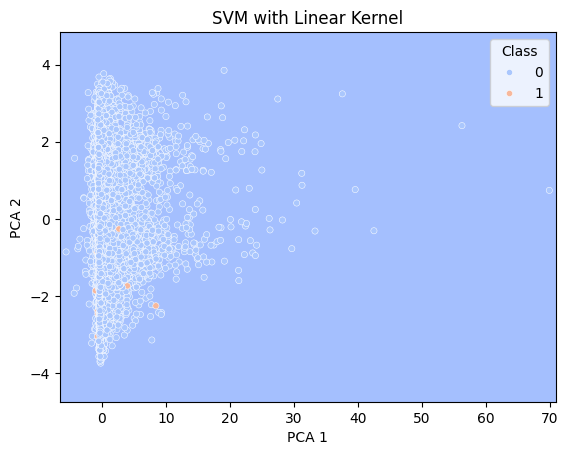

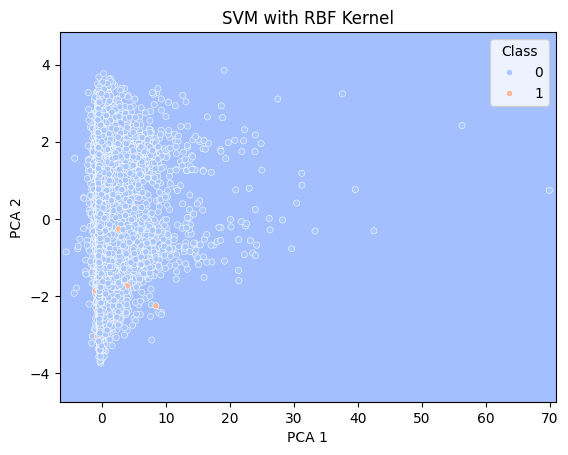

In [12]:
plot_decision_boundary(svm_linear, X_test, y_test, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_test, y_test, "SVM with RBF Kernel")